In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import os
os.chdir("/Users/samuel.gruffaz/leaspype_kernel/leaspy/leaspy/models/utils")
from regression.logistic_regressor import LogisticRegressor

import matplotlib.pyplot as plt
os.chdir("/Users/samuel.gruffaz/leaspype_kernel/leaspy")
from leaspy import Leaspy, AlgorithmSettings,IndividualParameters, Data, Dataset

In [2]:
os.chdir("/Users/samuel.gruffaz/Leaspype_kernel")
current_directory = os.path.join("leaspype", "leaspy_processing", "experiment_specific","Comparaison")
input_directory = os.path.join(current_directory, '_inputs/')
output_directory = os.path.join(current_directory, '_outputs/')

df = pd.read_csv(os.path.join(input_directory, 'data_normalized.csv'), dtype={'ID':str})
df.set_index(['ID','TIME'], inplace=True)

data=Data.from_dataframe(df)
dataset=Dataset(data)

In [6]:
A=np.array([1,2])
A.tolist()

[1, 2]

In [3]:
reg= LogisticRegressor()

In [4]:
param,Time=reg.ultra_fit(dataset)

/opt/anaconda3/envs/leaspy/lib/python3.7/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/opt/anaconda3/envs/leaspy/lib/python3.7/site-packages/scipy/optimize/optimize.py:2392: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(wlim - xc) >= 0.0:
/opt/anaconda3/envs/leaspy/lib/python3.7/site-packages/scipy/optimize/optimize.py:2396: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(xc - w) > 0.0:
/Users/samuel.gruffaz/leaspype_kernel/leaspy/leaspy/models/utils/regression/logistic_regressor.py:32: RuntimeWarning: overflow encountered in exp
  L=np.ones(len(T))/(1.+param[0]*np.exp(-param[1]*T))


In [5]:
print(len(list(param.keys())))

214


/opt/anaconda3/envs/leaspy/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


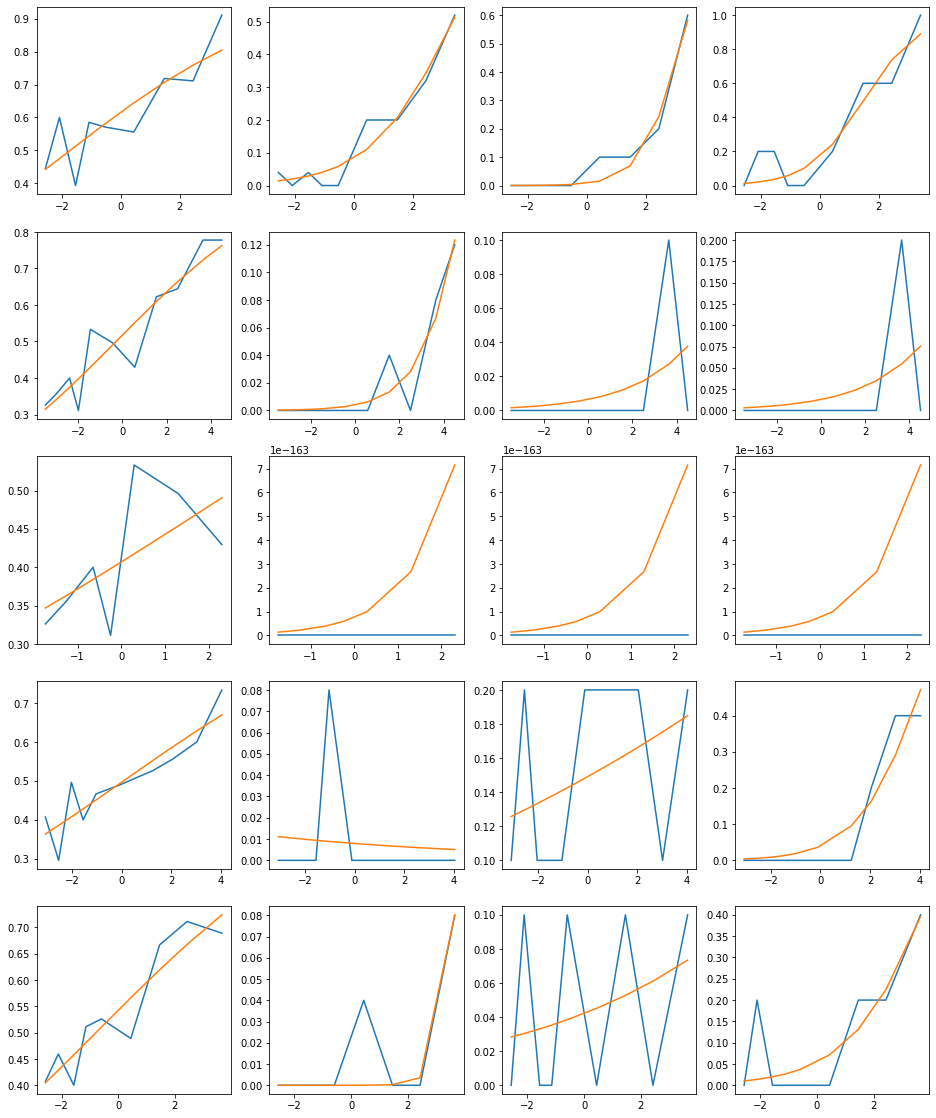

In [5]:
df = dataset.to_pandas()
df.set_index(["ID", "TIME"], inplace=True)
nb_ind_plot=5
dimension=4
fig, ax = plt.subplots(nb_ind_plot, dimension, figsize=(dimension * 4, nb_ind_plot * 4))

for i in range(nb_ind_plot):
    idx=list(param.keys())[i]
            
    for dim in range(data.dimension):
        df_patient = df.loc[idx]
        df_patient_dim = df_patient.iloc[:, dim].dropna()
        x=Time[idx]
        #x = df_patient_dim.index.get_level_values('TIME').values
        y = df_patient_dim.values
            
        ax[i,dim].plot(x,y)
        ax[i,dim].plot(x,reg.fonction(x)(param[idx][dim]))


fig.show()

In [12]:
beta=[]

for key in param.keys():
    pp=param[key]
    bb=pp[:3,1]
    beta.append(bb.tolist())

beta_array=np.array(beta)


In [13]:
norm1=np.expand_dims(np.linalg.norm(beta_array,axis=1),axis=1)
beta_array=beta_array/norm1
direc=pd.DataFrame(beta_array.tolist())
#direc["taille"]=taille
#direc["erreur"]=erreur

In [14]:
import plotly.express as px

figure=px.scatter_3d(direc,x=0,y=1,z=2)
figure.show()
